# SAT & ACT Analysis

## Problem Statement

As part of admission requirements for the US colleges and universities, both the ACT and SAT are well-known standardized tests. Each test measures students' proficiency in different areas such as Maths, Reading, English, etc.

In this Exploration Data Analysis, I will be analyzing SAT and ACT scores as well as participation rates from each state in the United States. Then, I will be identifying a trend in the data and combine the data analysis with domain research to identify likely factors influencing participation rates and scores in various states.

Therefore, we can make a recommendation to the College Board that administers the SAT, wants to track statewide participation and recommends where the money is best spent to improve SAT participation rates.

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import math

import plotly.graph_objects as go

from scipy.stats import normaltest, skew

import scipy.stats as stats

from IPython.display import Image

import warnings

warnings.filterwarnings("ignore")

sns.set_style('whitegrid')

%matplotlib inline

## 2017 Data Import and Cleaning

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
df_sat_2017 = pd.read_csv('..\\data\\sat_2017.csv')

df_act_2017 = pd.read_csv('..\\data\\act_2017.csv')

In [3]:
df_sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [4]:
df_sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [5]:
df_sat_2017.describe().T

,count,mean,std,min,25%,50%,75%,max
Evidence-Based Reading and Writing,51.0,569.117647,45.666901,482.0,533.5,559.0,613.0,644.0
Math,51.0,547.627451,84.909119,52.0,522.0,548.0,599.0,651.0
Total,51.0,1126.098039,92.494812,950.0,1055.5,1107.0,1212.0,1295.0


In [6]:
df_act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [7]:
df_act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


In [8]:
df_act_2017.describe().T

,count,mean,std,min,25%,50%,75%,max
English,52.0,20.919231,2.332132,16.3,19.000,20.55,23.300,25.5
Math,52.0,21.173077,1.963602,18.0,19.400,20.90,23.100,25.3
Reading,52.0,22.001923,2.048672,18.1,20.475,21.70,24.125,26.0
Science,52.0,21.040385,3.151113,2.3,19.900,21.15,22.525,24.9


#### Quickly Describe Data

##### SAT 2017 Dataset:

    - Dataset contains SAT score including EBRW and Math for each state in the United States.
    - 51 entries including 50 states of the U.S.A & District of Columbia.
    - Two object columns (State and Participation).
    - Participation is being read as object dtype, because of % appended at end of each value.
    - Remaining 3 columns are of dtype int.
    - Total number of features are 5.
    

##### Act 2017 Dataset:

    - Dataset contains ACT score including English, Math, Reading and Science for each state in the United States & District of Columbia and a row for "National" values, (52 entries).
    - There are 3 object columns: State, Participation and Composite.
    - Participation is being read as object dtype, because of % appended at end of each value.
    - Composite is being read as object because of "x" appended at end of value in row of index 51.
    - The reamining 4 columns are of dtype float.
    - Total number of features are 7.

#### Identifying some issues by observations


##### SAT Dataset:
    
    - SAT range score: 400-1600.
    - The min Math value onbserved is 52 and the max is 651. This seems abnormal based on the SAT range score.
    - The Total is the sum of EBRW and the Math sections. By observation, the total is not equal to the sum of Math and EBRW scores
    - Participation values were treated as strings.
    
##### ACT Dataset:

    - ACT range score: 1-36.
    - Composite values and Participation values were treated as strings.
    - Science has a min of 2.3 and a max of 24.9. This could be a typo.

#### SAT Dataset quick fix

In [9]:
#T is the list of positions of values which might be odd.

T = [x for x in range(len(df_sat_2017['Math'])) if df_sat_2017.loc[x, 'Math'] + df_sat_2017.loc[x, 'Evidence-Based Reading and Writing'] != df_sat_2017.loc[x, 'Total'] ]

In [10]:
# If we assume to accept rouding errors, then total is not 100% equal to the sum of math and EBRW

# Assumption Error = 2%

T1 = [y for y in T 
      if (df_sat_2017.loc[y, 'Math'] + df_sat_2017.loc[y, 'Evidence-Based Reading and Writing'] ) < 0.98* df_sat_2017.loc[y, 'Total'] 
        or (df_sat_2017.loc[y, 'Math'] + df_sat_2017.loc[y, 'Evidence-Based Reading and Writing']) > 1.02* df_sat_2017.loc[y, 'Total'] ]

T1

[20]

In [11]:
#Fixing df_sat_2017 typos

df_sat_2017.loc[df_sat_2017['Math'] == df_sat_2017.loc[20, 'Math'], 'Math'] = df_sat_2017.loc[20, 'Total'] - df_sat_2017.loc[20,'Evidence-Based Reading and Writing']

#### ACT Dataset quick fix

In [12]:
# Changing the Science min from 2.3 to 23

df_act_2017[df_act_2017.Science ==2.3]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [13]:
df_act_2017.iloc[21,5] = 23

In [14]:
# Identifying odd values in "Composite" column

# x is the list of the position of odd values

com = df_act_2017['Composite'].apply(pd.to_numeric, errors='coerce')

x = [np.argwhere(np.isnan(com))]

print(x)

[array([[51]], dtype=int64)]


In [15]:
df_act_2017.loc[51, 'Composite']

'20.2x'

In [16]:
# Replaceing odd value to the right one

df_act_2017.loc[df_act_2017.Composite == '20.2x', 'Composite'] = '20.2'

In [17]:
# Deleting "%" in Participate column

def convert_part(x):
    return x[:-1]

df_sat_2017["Participation"] = df_sat_2017['Participation'].apply(convert_part)

df_act_2017["Participation"] = df_act_2017['Participation'].apply(convert_part)

In [18]:
# Converting Participation and Composite values into float

df_sat_2017['Participation'] = df_sat_2017['Participation'].astype(float)

df_act_2017['Composite'] = df_act_2017['Composite'].astype(float)

df_act_2017['Participation'] = df_act_2017['Participation'].astype(float)

##### Double check!

In [19]:
df_sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [20]:
df_sat_2017.describe().T

,count,mean,std,min,25%,50%,75%,max
Participation,51.0,39.803922,35.276632,2.0,4.0,38.0,66.0,100.0
Evidence-Based Reading and Writing,51.0,569.117647,45.666901,482.0,533.5,559.0,613.0,644.0
Math,51.0,556.882353,47.121395,468.0,523.5,548.0,599.0,651.0
Total,51.0,1126.098039,92.494812,950.0,1055.5,1107.0,1212.0,1295.0


In [21]:
df_act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


In [22]:
df_act_2017.describe().T

,count,mean,std,min,25%,50%,75%,max
Participation,52.0,65.153846,31.832518,8.0,31.000,68.00,100.000,100.0
English,52.0,20.919231,2.332132,16.3,19.000,20.55,23.300,25.5
Math,52.0,21.173077,1.963602,18.0,19.400,20.90,23.100,25.3
Reading,52.0,22.001923,2.048672,18.1,20.475,21.70,24.125,26.0
Science,52.0,21.438462,1.719571,18.2,19.975,21.30,23.050,24.9
Composite,52.0,21.509615,2.002083,17.8,19.800,21.40,23.600,25.5


#### Rename Columns
Change the names of the columns to more expressive names so that we can tell the difference the SAT columns and the ACT columns.

In [23]:
# drug = drug.rename(columns={'alcohol-use': 'beer-use', 'alcohol-frequency': 'beers-consumed'})

new_columns_dict_sat_2017 = {
        'State': 'state',
        'Participation':'part_sat_2017',
        'Evidence-Based Reading and Writing':'proficiency_2017',
        'Math':'math_sat_2017',
        'Total':'total_sat_2017'}

df_sat_2017.rename(columns = new_columns_dict_sat_2017, inplace=True)

new_columns_dict_act_2017 = {
        'State': 'state',
        'Participation':'part_act_2017',
        'English':'eng_act_2017',
        'Math':'math_act_2017',
        'Reading':'reading_act_2017',
        'Science':'science_act_2017',
        'Composite':'composite_act_2017'}

df_act_2017.rename(columns = new_columns_dict_act_2017, inplace=True)

In [24]:
df_sat_2017.head()

,state,part_sat_2017,proficiency_2017,math_sat_2017,total_sat_2017
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [25]:
df_act_2017.head()

,state,part_act_2017,eng_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


#### Data dictionary

To provides a quick overview of features/variables/columns, alongside data types and descriptions.

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT/ACT| The name of states in US.| 
|part_sat_2017|float|SAT| The percentage of participation for SAT in 2017.|
|proficiency_2017|integer|SAT| The average of Evidence-Based Reading and Writing score for SAT in 2017.|
|math_sat_2017|integer|SAT| The average of Math score for SAT in 2017.|
|total_2017|integer|SAT| The average of total of Maths and Evidence-Based Reading and Writing score for SAT in 2017.|
|part_act_2017|float|ACT| The percentage of participation for ACT in 2017.|
|eng_2017|float|ACT| The average of English score for ACT in 2017.|
|math_act_2017|float|ACT| The average of Math score for ACT in 2017.|
|reading_2017|float|ACT| The average of Reading score for ACT in 2017.|
|science_2017|float|ACT| The average of Science score for ACT in 2017.|
|composite_2017|float|ACT| The mean of Math, English, Reading, and Science scores for ACT in 2017.|

#### Drop unnecessary rows

In [26]:
#Identify extra row

# pd.merge(df_sat_2017["State"], df_act_2017['State'])

l1 = df_sat_2017["state"].tolist()
l2 = df_act_2017['state'].tolist()

#compare length of l1 and l2

print(len(l1))

print(len(l2))

51
52


In [27]:
# "l" is the list of differnt values

l = [i for i in l2 if i not in l1]

l

['National']

In [28]:
# Drop rows which contains "National" on "state" column

df_act_2017 = df_act_2017[df_act_2017.state != 'National']

df_act_2017 = df_act_2017.reset_index(drop = True)

df_act_2017.head()

,state,part_act_2017,eng_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
4,California,31.0,22.5,22.7,23.1,22.2,22.8


#### Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key.

In [29]:
df_2017 = pd.merge(df_sat_2017,df_act_2017, on="state", right_index=True, left_index=True)

df_2017.head()

,state,part_sat_2017,proficiency_2017,math_sat_2017,total_sat_2017,part_act_2017,eng_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


In [30]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
state                 51 non-null object
part_sat_2017         51 non-null float64
proficiency_2017      51 non-null int64
math_sat_2017         51 non-null int64
total_sat_2017        51 non-null int64
part_act_2017         51 non-null float64
eng_act_2017          51 non-null float64
math_act_2017         51 non-null float64
reading_act_2017      51 non-null float64
science_act_2017      51 non-null float64
composite_act_2017    51 non-null float64
dtypes: float64(7), int64(3), object(1)
memory usage: 4.5+ KB


In [31]:
df_2017.describe().T

,count,mean,std,min,25%,50%,75%,max
part_sat_2017,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
proficiency_2017,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
math_sat_2017,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
total_sat_2017,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
part_act_2017,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
eng_act_2017,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
math_act_2017,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
reading_act_2017,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
science_act_2017,51.0,21.447059,1.735552,18.2,19.95,21.3,23.10,24.9
composite_act_2017,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Save cleaned data, and merged dataframe

In [32]:
df_2017.to_csv (r'..\\data\\combine_2017.csv', index = None, header=True)

## 2018 Data Import and Cleaning

In [33]:
# Reading data files

df_act_2018 = pd.read_csv('..\\data\\act_2018.csv')

df_sat_2018 = pd.read_csv('..\\data\\sat_2018.csv')

##### Exploring the data

In [34]:
df_act_2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [35]:
df_act_2018.describe().T

,count,mean,std,min,25%,50%,75%,max
Average Composite Score,53.0,21.460377,2.069591,17.7,20.0,20.8,23.5,25.6
Average English Score,53.0,20.958491,2.403638,16.6,19.1,20.2,23.7,26.0
Average Math Score,53.0,21.101887,1.999855,17.8,19.4,20.6,23.1,25.2
Average Reading Score,53.0,21.988679,2.129614,18.0,20.5,21.3,24.0,26.1
Average Science Score,53.0,21.320755,1.837992,17.9,20.0,20.8,23.0,24.9


In [36]:
df_act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
State                            53 non-null object
Percentage of Students Tested    53 non-null object
Average Composite Score          53 non-null float64
Average English Score            53 non-null float64
Average Math Score               53 non-null float64
Average Reading Score            53 non-null float64
Average Science Score            53 non-null float64
dtypes: float64(5), object(2)
memory usage: 3.0+ KB


In [37]:
df_sat_2018.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [38]:
df_sat_2018.describe().T

,count,mean,std,min,25%,50%,75%,max
EBRW,53.0,564.792453,46.281895,490.0,534.0,552.0,615.0,643.0
Math,53.0,553.905660,51.687770,445.0,519.0,544.0,595.0,655.0
Total,53.0,1119.207547,97.833917,935.0,1053.0,1098.0,1229.0,1298.0


In [39]:
df_sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
State                 53 non-null object
Participation Rate    53 non-null object
EBRW                  53 non-null int64
Math                  53 non-null int64
Total                 53 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [40]:
df_act_2018['Percentage of Students Tested'].unique()

array(['100', '33', '66', '27', '30', '26', '17', '32', '53', '89', '36',
       '43', '68', '71', 'Not given', '7', '31', '25', '22', '99', '16',
       '67', '98', '42', '15', '77', '41', '24', '65'], dtype=object)

We will do the same procedure as 2017 Datasets

#### ACT Dataset quick fix

In [41]:
# Replacing "Not Given" to "0" in "Percentage of Students Tested" column

df_act_2018.loc[df_act_2018['Percentage of Students Tested'] == 'Not given', 'Percentage of Students Tested'] = "0"

In [42]:
# Converting to data type

df_act_2018['Percentage of Students Tested'] = df_act_2018['Percentage of Students Tested'].astype(float)

In [43]:
new_columns_dict_act_2018 = {
        'State': 'state',
        'Percentage of Students Tested':'part_act_2018',
        'Average English Score':'eng_act_2018',
        'Average Math Score':'math_act_2018',
        'Average Reading Score':'reading_act_2018',
        'Average Science Score':'science_act_2018',
        'Average Composite Score':'composite_act_2018'}

df_act_2018.rename(columns = new_columns_dict_act_2018, inplace=True)

In [44]:
df_act_2018.head()

,state,part_act_2018,composite_act_2018,eng_act_2018,math_act_2018,reading_act_2018,science_act_2018
0,Alabama,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100.0,19.4,19.1,18.9,19.7,19.4
4,California,27.0,22.7,22.5,22.5,23.0,22.1


In [45]:
df_act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
state                 53 non-null object
part_act_2018         53 non-null float64
composite_act_2018    53 non-null float64
eng_act_2018          53 non-null float64
math_act_2018         53 non-null float64
reading_act_2018      53 non-null float64
science_act_2018      53 non-null float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


In [46]:
df_act_2018.describe().T

,count,mean,std,min,25%,50%,75%,max
part_act_2018,53.0,53.283019,36.957032,0.0,24.0,42.0,100.0,100.0
composite_act_2018,53.0,21.460377,2.069591,17.7,20.0,20.8,23.5,25.6
eng_act_2018,53.0,20.958491,2.403638,16.6,19.1,20.2,23.7,26.0
math_act_2018,53.0,21.101887,1.999855,17.8,19.4,20.6,23.1,25.2
reading_act_2018,53.0,21.988679,2.129614,18.0,20.5,21.3,24.0,26.1
science_act_2018,53.0,21.320755,1.837992,17.9,20.0,20.8,23.0,24.9


#### SAT Dataset quick fix

In [47]:
#Cleaning data for sat_2018

df_sat_2018["Participation Rate"] = df_sat_2018['Participation Rate'].apply(convert_part)

In [48]:
df_sat_2018['Participation Rate'].unique()

array(['6', '43', '29', '5', '60', '100', '92', '97', '70', '56', '99',
       '67', '3', '4', '76', '80', '10', '23', '96', '82', '16', '79',
       '52', '2', '18', '8', '48', '', '55', '66', '64', '68', '69', '28'],
      dtype=object)

In [49]:
# Replacing " " to "0" in "Participation Rate" column

df_sat_2018.loc[df_sat_2018['Participation Rate'] == '', 'Participation Rate'] = "0"

In [50]:
# Converting data type

df_sat_2018['Participation Rate'] = df_sat_2018['Participation Rate'].astype(float)

In [51]:
df_sat_2018.describe().T

,count,mean,std,min,25%,50%,75%,max
Participation Rate,53.0,44.867925,38.340096,0.0,4.0,48.0,79.0,100.0
EBRW,53.0,564.792453,46.281895,490.0,534.0,552.0,615.0,643.0
Math,53.0,553.905660,51.687770,445.0,519.0,544.0,595.0,655.0
Total,53.0,1119.207547,97.833917,935.0,1053.0,1098.0,1229.0,1298.0


In [52]:
df_sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
State                 53 non-null object
Participation Rate    53 non-null float64
EBRW                  53 non-null int64
Math                  53 non-null int64
Total                 53 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


#### Rename Columns

In [53]:
new_columns_dict_sat_2018 = {
        'State': 'state',
        'Participation Rate':'part_sat_2018',
        'EBRW':'proficiency_2018',
        'Math':'math_sat_2018',
        'Total':'total_sat_2018'}

df_sat_2018.rename(columns = new_columns_dict_sat_2018, inplace=True)

In [54]:
df_sat_2018.head()

,state,part_sat_2018,proficiency_2018,math_sat_2018,total_sat_2018
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


#### Data dictionary

To provides a quick overview of features/variables/columns, alongside data types and descriptions.

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT/ACT| The name of states in US.| 
|part_sat_2018|float|SAT| The percentage of participation for SAT in 2018.|
|proficiency_2018|integer|SAT| The average of Evidence-Based Reading and Writing score for SAT in 2018.|
|math_sat_2018|integer|SAT| The average of Math score for SAT in 2018.|
|total_2018|integer|SAT| The average of total of Maths and Evidence-Based Reading and Writing score for SAT in 2018.|
|part_act_2018|float|ACT| The percentage of participation for ACT in 2018.|
|eng_2018|float|ACT| The average of English score for ACT in 2018.|
|math_act_2018|float|ACT| The average of Math score for ACT in 2018.|
|reading_2018|float|ACT| The average of Reading score for ACT in 2018.|
|science_2018|float|ACT| The average of Science score for ACT in 2018.|
|composite_2018|float|ACT| The mean of Math, English, Reading, and Science scores for ACT in 2018.|

#### Merge Dataframes

In [55]:
df_2018 = pd.merge(df_sat_2018,df_act_2018, on="state",right_index=True, left_index=True)

df_2018.head()

,state,part_sat_2018,proficiency_2018,math_sat_2018,total_sat_2018,part_act_2018,composite_act_2018,eng_act_2018,math_act_2018,reading_act_2018,science_act_2018
0,Alabama,6.0,595,571,1166,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,43.0,562,544,1106,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,29.0,577,572,1149,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,5.0,592,576,1169,100.0,19.4,19.1,18.9,19.7,19.4
4,California,60.0,540,536,1076,27.0,22.7,22.5,22.5,23.0,22.1


In [56]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 11 columns):
state                 53 non-null object
part_sat_2018         53 non-null float64
proficiency_2018      53 non-null int64
math_sat_2018         53 non-null int64
total_sat_2018        53 non-null int64
part_act_2018         53 non-null float64
composite_act_2018    53 non-null float64
eng_act_2018          53 non-null float64
math_act_2018         53 non-null float64
reading_act_2018      53 non-null float64
science_act_2018      53 non-null float64
dtypes: float64(7), int64(3), object(1)
memory usage: 4.6+ KB


In [57]:
df_2018.describe().T

,count,mean,std,min,25%,50%,75%,max
part_sat_2018,53.0,44.867925,38.340096,0.0,4.0,48.0,79.0,100.0
proficiency_2018,53.0,564.792453,46.281895,490.0,534.0,552.0,615.0,643.0
math_sat_2018,53.0,553.905660,51.687770,445.0,519.0,544.0,595.0,655.0
total_sat_2018,53.0,1119.207547,97.833917,935.0,1053.0,1098.0,1229.0,1298.0
part_act_2018,53.0,53.283019,36.957032,0.0,24.0,42.0,100.0,100.0
composite_act_2018,53.0,21.460377,2.069591,17.7,20.0,20.8,23.5,25.6
eng_act_2018,53.0,20.958491,2.403638,16.6,19.1,20.2,23.7,26.0
math_act_2018,53.0,21.101887,1.999855,17.8,19.4,20.6,23.1,25.2
reading_act_2018,53.0,21.988679,2.129614,18.0,20.5,21.3,24.0,26.1
science_act_2018,53.0,21.320755,1.837992,17.9,20.0,20.8,23.0,24.9


#### Combine your 2017 and 2018 data into a single dataframe

In [58]:
df_final = pd.merge(df_2017,df_2018, on="state",how = 'outer',right_index=True, left_index=True)

In [59]:
df_final.to_csv (r'..\\data\\final.csv', index = None, header=True)

In [60]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 52
Data columns (total 21 columns):
state                 53 non-null object
part_sat_2017         51 non-null float64
proficiency_2017      51 non-null float64
math_sat_2017         51 non-null float64
total_sat_2017        51 non-null float64
part_act_2017         51 non-null float64
eng_act_2017          51 non-null float64
math_act_2017         51 non-null float64
reading_act_2017      51 non-null float64
science_act_2017      51 non-null float64
composite_act_2017    51 non-null float64
part_sat_2018         53 non-null float64
proficiency_2018      53 non-null int64
math_sat_2018         53 non-null int64
total_sat_2018        53 non-null int64
part_act_2018         53 non-null float64
composite_act_2018    53 non-null float64
eng_act_2018          53 non-null float64
math_act_2018         53 non-null float64
reading_act_2018      53 non-null float64
science_act_2018      53 non-null float64
dtypes: float64(17), i

In [61]:
df_final.dropna(inplace = True) 

In [62]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
part_sat_2017,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
proficiency_2017,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
math_sat_2017,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
total_sat_2017,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
part_act_2017,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
eng_act_2017,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
math_act_2017,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
reading_act_2017,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
science_act_2017,51.0,21.447059,1.735552,18.2,19.95,21.3,23.10,24.9
composite_act_2017,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


In [63]:
df_final.head()

,state,part_sat_2017,proficiency_2017,math_sat_2017,total_sat_2017,part_act_2017,eng_act_2017,math_act_2017,reading_act_2017,science_act_2017,...,part_sat_2018,proficiency_2018,math_sat_2018,total_sat_2018,part_act_2018,composite_act_2018,eng_act_2018,math_act_2018,reading_act_2018,science_act_2018
0,Alabama,5.0,593.0,572.0,1165.0,100.0,18.9,18.4,19.7,19.4,...,6.0,595,571,1166,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,38.0,547.0,533.0,1080.0,65.0,18.7,19.8,20.4,19.9,...,43.0,562,544,1106,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,30.0,563.0,553.0,1116.0,62.0,18.6,19.8,20.1,19.8,...,29.0,577,572,1149,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,3.0,614.0,594.0,1208.0,100.0,18.9,19.0,19.7,19.5,...,5.0,592,576,1169,100.0,19.4,19.1,18.9,19.7,19.4
4,California,53.0,531.0,524.0,1055.0,31.0,22.5,22.7,23.1,22.2,...,60.0,540,536,1076,27.0,22.7,22.5,22.5,23.0,22.1


## Exploratory Data Analysis


### Summary Statistics

In [64]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
part_sat_2017,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
proficiency_2017,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
math_sat_2017,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
total_sat_2017,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
part_act_2017,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
eng_act_2017,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
math_act_2017,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
reading_act_2017,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
science_act_2017,51.0,21.447059,1.735552,18.2,19.95,21.3,23.10,24.9
composite_act_2017,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


In [65]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 21 columns):
state                 51 non-null object
part_sat_2017         51 non-null float64
proficiency_2017      51 non-null float64
math_sat_2017         51 non-null float64
total_sat_2017        51 non-null float64
part_act_2017         51 non-null float64
eng_act_2017          51 non-null float64
math_act_2017         51 non-null float64
reading_act_2017      51 non-null float64
science_act_2017      51 non-null float64
composite_act_2017    51 non-null float64
part_sat_2018         51 non-null float64
proficiency_2018      51 non-null int64
math_sat_2018         51 non-null int64
total_sat_2018        51 non-null int64
part_act_2018         51 non-null float64
composite_act_2018    51 non-null float64
eng_act_2018          51 non-null float64
math_act_2018         51 non-null float64
reading_act_2018      51 non-null float64
science_act_2018      51 non-null float64
dtypes: float64(17), i

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$


In [66]:
def std_cal(val):   
    
    return math.sqrt(np.mean((val-np.mean(val))**2))

In [67]:
name = df_final.columns[1:]

data = [std_cal(df_final[x]) for x in name]

In [68]:
sd = dict(zip(name, data))

In [69]:
sd

{'part_sat_2017': 34.92907076664508,
 'proficiency_2017': 45.21697020437866,
 'math_sat_2017': 46.65713364485503,
 'total_sat_2017': 91.58351056778743,
 'part_act_2017': 31.824175751231806,
 'eng_act_2017': 2.3304876369363363,
 'math_act_2017': 1.9624620273436781,
 'reading_act_2017': 2.0469029314842646,
 'science_act_2017': 1.7184526716715494,
 'composite_act_2017': 2.000786081581989,
 'part_sat_2018': 37.78025864256104,
 'proficiency_2018': 44.39482428070038,
 'math_sat_2018': 48.88801159605722,
 'total_sat_2018': 93.54265948024701,
 'part_act_2018': 35.97394289585239,
 'composite_act_2018': 2.077280480469732,
 'eng_act_2018': 2.4086158305438583,
 'math_act_2018': 2.007649730268297,
 'reading_act_2018': 2.1390206772962257,
 'science_act_2018': 1.8480888847540735}

#### Investigate trends in the data

Considering the some questions as follows:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

In [70]:
#SAT 2017. Highest participation rate

df_final.sort_values(by = ["part_sat_2017"], ascending=False) [["state","part_sat_2017"]].head(5)

,state,part_sat_2017
8,District of Columbia,100.0
22,Michigan,100.0
6,Connecticut,100.0
7,Delaware,100.0
29,New Hampshire,96.0


In [71]:
#SAT 2017. Lowest participation rate

df_final.sort_values(by = ["part_sat_2017"], ascending=True) [["state","part_sat_2017"]].head(5)

,state,part_sat_2017
34,North Dakota,2.0
24,Mississippi,2.0
15,Iowa,2.0
25,Missouri,3.0
44,Utah,3.0


In [72]:
#SAT 2018. Highest participation rate

df_final.sort_values(by = ["part_sat_2018"], ascending=False) [["state","part_sat_2018"]].head(5)

,state,part_sat_2018
22,Michigan,100.0
5,Colorado,100.0
6,Connecticut,100.0
7,Delaware,100.0
12,Idaho,100.0


In [73]:
# Do any states with 100% participation on a given test have a rate change year-to-year?

# District of Columbia with 100% participation on SAT has a rate change 2017 to 2018

In [74]:
#SAT 2018. Lowest participation rate

df_final.sort_values(by = ["part_sat_2018"], ascending=True) [["state","part_sat_2018"]].head(4)

,state,part_sat_2018
47,Washington,0.0
39,Rhode Island,0.0
34,North Dakota,2.0
42,Tennessee,3.0


In [75]:
#ACT 2017. Highest participation rate

df_final.sort_values(by = ["part_act_2017"], ascending=False) [["state","part_act_2017"]].head(20)

,state,part_act_2017
0,Alabama,100.0
17,Kentucky,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0
40,South Carolina,100.0
36,Oklahoma,100.0
33,North Carolina,100.0
28,Nevada,100.0
26,Montana,100.0


In [76]:
#ACT 2018. Highest participation rate

df_final.sort_values(by = ["part_act_2018"], ascending=False) [["state","part_act_2018"]].head(17)

,state,part_act_2018
0,Alabama,100.0
17,Kentucky,100.0
45,Vermont,100.0
43,Texas,100.0
41,South Dakota,100.0
36,Oklahoma,100.0
29,New Hampshire,100.0
28,Nevada,100.0
26,Montana,100.0
24,Mississippi,100.0


In [77]:
#ACT 2017. Lowest participation rate

df_final.sort_values(by = ["part_act_2017"], ascending=True) [["state","part_act_2017"]].head(3)

,state,part_act_2017
19,Maine,8.0
29,New Hampshire,18.0
7,Delaware,18.0


In [78]:
#ACT 2018. Lowest participation rate

df_final.sort_values(by = ["part_act_2018"], ascending=True) [["state","part_act_2018"]].head(7)

,state,part_act_2018
18,Louisiana,0.0
37,Oregon,0.0
34,North Dakota,0.0
39,Rhode Island,0.0
27,Nebraska,0.0
19,Maine,7.0
40,South Carolina,15.0


In [79]:
# Do any states show have >50% participation on both tests either year?

df_final[(df_final['part_sat_2017'] > 50) & (df_final['part_act_2017'] > 50)]

,state,part_sat_2017,proficiency_2017,math_sat_2017,total_sat_2017,part_act_2017,eng_act_2017,math_act_2017,reading_act_2017,science_act_2017,...,part_sat_2018,proficiency_2018,math_sat_2018,total_sat_2018,part_act_2018,composite_act_2018,eng_act_2018,math_act_2018,reading_act_2018,science_act_2018
9,Florida,83.0,520.0,497.0,1017.0,73.0,19.0,19.4,21.0,19.4,...,97.0,522,493,1014,66.0,19.9,19.2,19.3,21.1,19.5
10,Georgia,61.0,535.0,515.0,1050.0,55.0,21.0,20.9,22.0,21.3,...,70.0,542,522,1064,53.0,21.4,20.9,20.7,21.2,21.4
11,Hawaii,55.0,544.0,541.0,1085.0,90.0,17.8,19.2,19.2,19.3,...,56.0,550,549,1099,89.0,18.9,18.2,19.0,19.1,19.0


In [80]:
df_final[(df_final['part_sat_2018'] > 50) & (df_final['part_act_2018'] > 50)]

,state,part_sat_2017,proficiency_2017,math_sat_2017,total_sat_2017,part_act_2017,eng_act_2017,math_act_2017,reading_act_2017,science_act_2017,...,part_sat_2018,proficiency_2018,math_sat_2018,total_sat_2018,part_act_2018,composite_act_2018,eng_act_2018,math_act_2018,reading_act_2018,science_act_2018
9,Florida,83.0,520.0,497.0,1017.0,73.0,19.0,19.4,21.0,19.4,...,97.0,522,493,1014,66.0,19.9,19.2,19.3,21.1,19.5
10,Georgia,61.0,535.0,515.0,1050.0,55.0,21.0,20.9,22.0,21.3,...,70.0,542,522,1064,53.0,21.4,20.9,20.7,21.2,21.4
11,Hawaii,55.0,544.0,541.0,1085.0,90.0,17.8,19.2,19.2,19.3,...,56.0,550,549,1099,89.0,18.9,18.2,19.0,19.1,19.0
29,New Hampshire,96.0,532.0,520.0,1052.0,18.0,25.4,25.1,26.0,24.9,...,96.0,535,528,1063,100.0,17.7,16.6,17.8,18.0,17.9
32,New York,67.0,528.0,523.0,1052.0,31.0,23.8,24.0,24.6,23.9,...,79.0,534,534,1068,67.0,19.4,18.3,19.1,20.1,19.7
41,South Dakota,3.0,612.0,603.0,1216.0,80.0,20.7,21.5,22.3,22.0,...,55.0,547,523,1070,100.0,18.3,17.3,18.2,18.6,18.5
49,Wisconsin,3.0,642.0,649.0,1291.0,100.0,19.7,20.4,20.6,20.9,...,69.0,543,538,1082,65.0,20.3,19.8,19.4,21.3,20.4


In [81]:
#Colorado has a big change of participation rate on SAT

df_final.loc[df_final['state'] == "Colorado"]

,state,part_sat_2017,proficiency_2017,math_sat_2017,total_sat_2017,part_act_2017,eng_act_2017,math_act_2017,reading_act_2017,science_act_2017,...,part_sat_2018,proficiency_2018,math_sat_2018,total_sat_2018,part_act_2018,composite_act_2018,eng_act_2018,math_act_2018,reading_act_2018,science_act_2018
5,Colorado,11.0,606.0,595.0,1201.0,100.0,20.1,20.3,21.2,20.9,...,100.0,519,506,1025,30.0,23.9,23.9,23.2,24.4,23.5


Florida, Georgia, and Hawaii all have more than 50% participation rate on both of the tests.

## Visualize the data

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

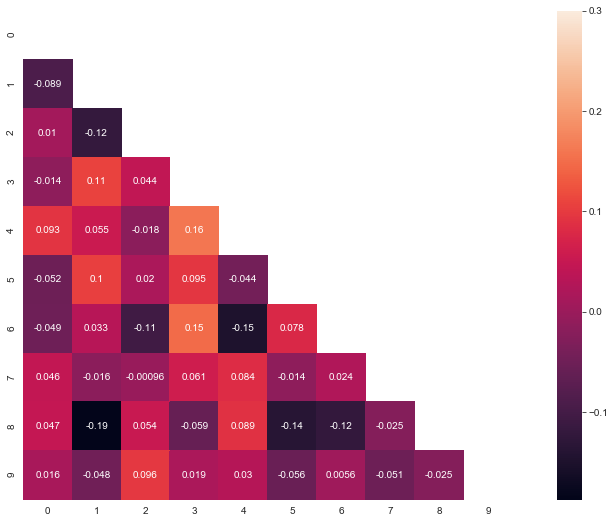

In [82]:
# Establish size of figure.
plt.figure(figsize=(16,9))

# Generate 10 variables of 200 random observations.
corr = np.corrcoef(np.random.randn(10, 200))

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)

#### Define a custom function to subplot histograms

In [83]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(12,10))  
    
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        
        ax[i].hist(dataframe[column]) # feel free to add more settings
        
        ax[i].set_title(list_of_titles[i])
        
        ax[i].set_xlabel(list_of_xlabels[i])
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 

- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

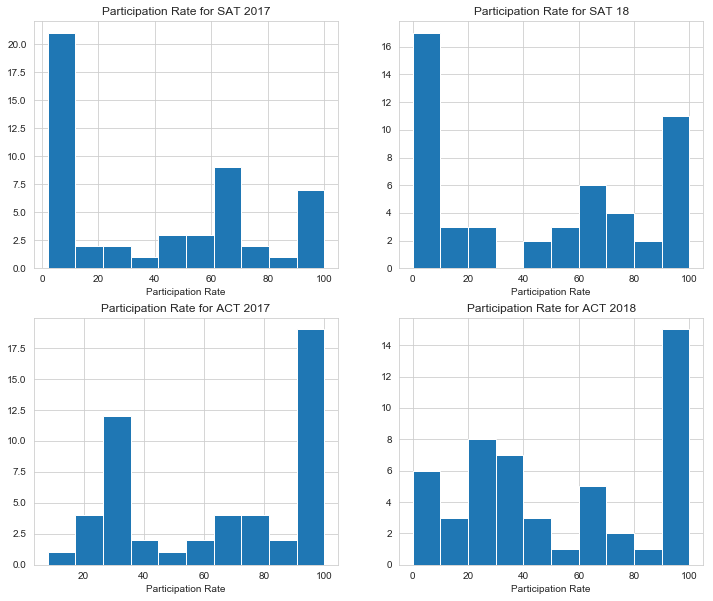

In [84]:
# Participation rates for SAT & ACT

subplot_histograms(df_final, 
                   ['part_sat_2017','part_sat_2018','part_act_2017','part_act_2018'],
                   ['Participation Rate for SAT 2017','Participation Rate for SAT 18', 'Participation Rate for ACT 2017', 'Participation Rate for ACT 2018'],
                   ['Participation Rate','Participation Rate','Participation Rate','Participation Rate']);

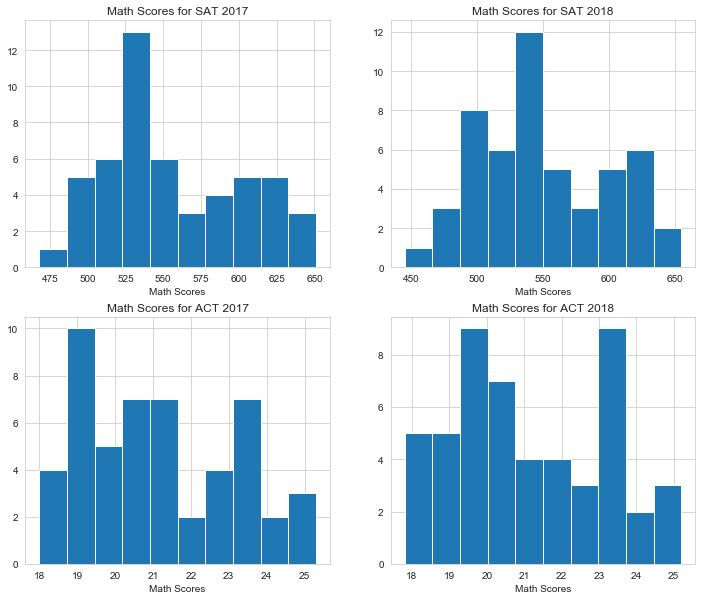

In [85]:
#Math scores for SAT & ACT

subplot_histograms(df_final, 
               ['math_sat_2017','math_sat_2018','math_act_2017','math_act_2018'],
               ['Math Scores for SAT 2017','Math Scores for SAT 2018', 'Math Scores for ACT 2017', 'Math Scores for ACT 2018'],
               ['Math Scores','Math Scores','Math Scores','Math Scores']);

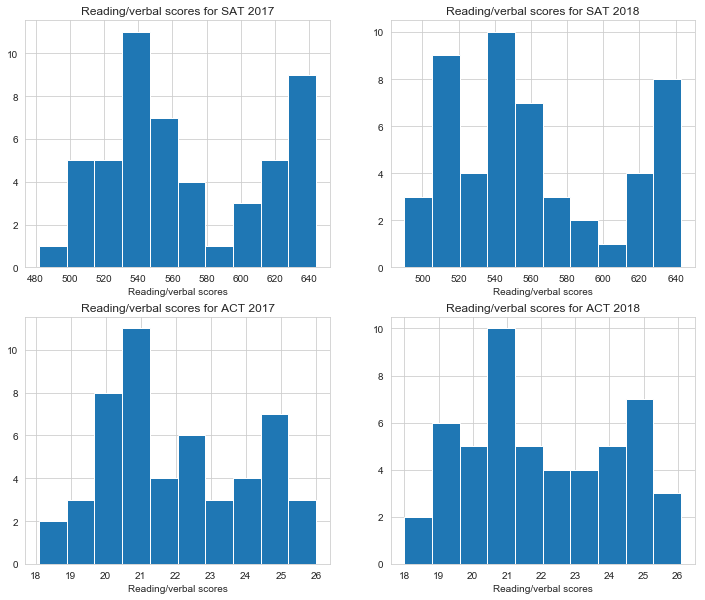

In [86]:
#Reading/verbal scores for SAT & ACT

subplot_histograms(df_final, 
               ['proficiency_2017', 'proficiency_2018', 'reading_act_2017', 'reading_act_2018'],
               ['Reading/verbal scores for SAT 2017','Reading/verbal scores for SAT 2018', 'Reading/verbal scores for ACT 2017', 'Reading/verbal scores for ACT 2018'],
               ['Reading/verbal scores','Reading/verbal scores','Reading/verbal scores','Reading/verbal scores']);

#### Plot and interpret scatter plots

- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Composite scores for ACT 2017 vs. 2018

In [87]:
def splot(dataframe, x, y, title, xlabels, ylabels):
    
    plt.figure(figsize=(10,5))
    
    
    plt.scatter(dataframe[x],dataframe[y]);
    
    plt.title(title ,fontsize = 12)
    
    plt.ylabel(ylabels, fontsize = 12)
    
    plt.xlabel(xlabels, fontsize = 12)  

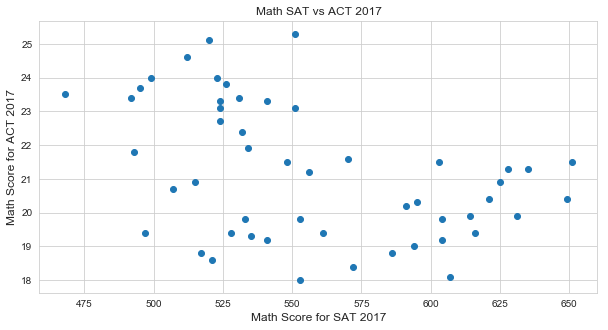

In [88]:
#SAT vs. ACT math scores for 2017

splot(dataframe = df_final, x = 'math_sat_2017', y = 'math_act_2017',
      xlabels = 'Math Score for SAT 2017', ylabels = 'Math Score for ACT 2017', title = 'Math SAT vs ACT 2017')

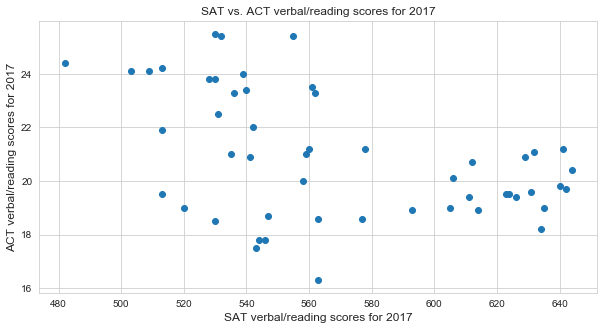

In [89]:
#SAT vs. ACT verbal/reading scores for 2017

splot(dataframe = df_final, x = 'proficiency_2017', y = 'eng_act_2017', 
      xlabels = 'SAT verbal/reading scores for 2017', ylabels = 'ACT verbal/reading scores for 2017', title = 'SAT vs. ACT verbal/reading scores for 2017')

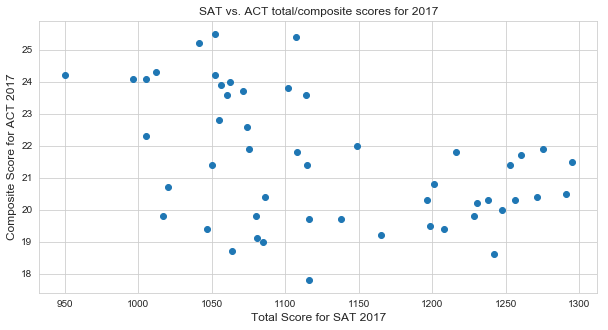

In [90]:
# SAT vs. ACT total/composite scores for 2017

splot(dataframe = df_final, x = 'total_sat_2017', y = 'composite_act_2017',
      xlabels = 'Total Score for SAT 2017', ylabels = 'Composite Score for ACT 2017', title = 'SAT vs. ACT total/composite scores for 2017')

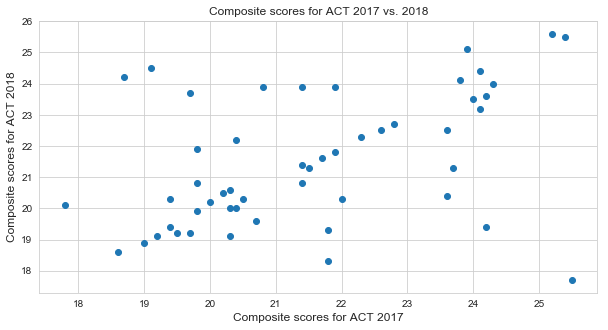

In [91]:
# Composite scores for ACT 2017 vs. 2018

splot(dataframe = df_final, x = 'composite_act_2017', y = 'composite_act_2018',
      xlabels = 'Composite scores for ACT 2017', ylabels = 'Composite scores for ACT 2018', title = 'Composite scores for ACT 2017 vs. 2018')

#### Plot and interpret boxplots

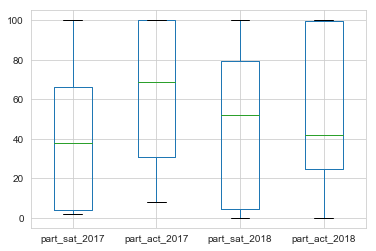

In [92]:
final_boxplot = df_final.boxplot(column=['part_sat_2017','part_act_2017','part_sat_2018','part_act_2018'])

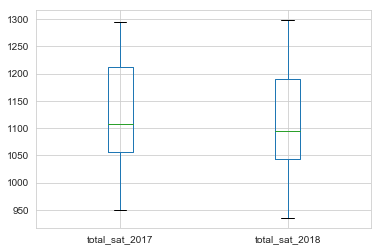

In [93]:
final_boxplot = df_final.boxplot(column=['total_sat_2017','total_sat_2018'])

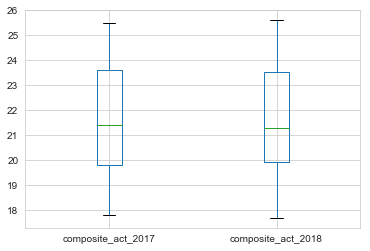

In [94]:
final_boxplot = df_final.boxplot(column=['composite_act_2017','composite_act_2018'])

In [95]:
# define a function to normalize the values where they can lie in the range (0,1).

final_normed = pd.DataFrame([(df_final[x]-df_final[x].min())/
                             (df_final[x].max()-df_final[x].min()) for x in df_final if df_final[x].dtypes != object]).T

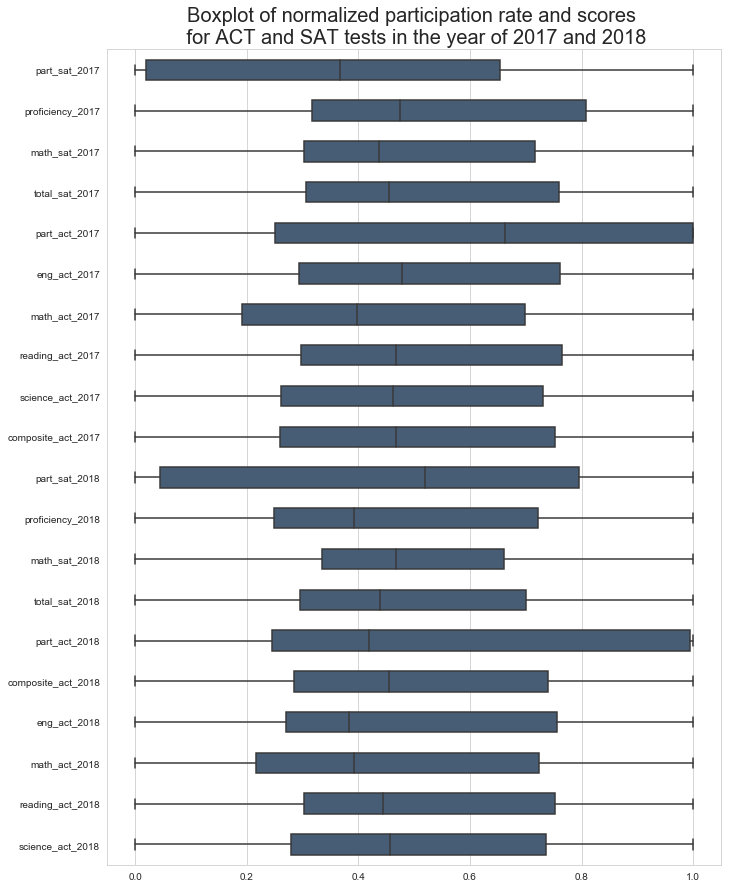

In [96]:
plt.figure(figsize =(11,15))
sns.boxplot(data=final_normed, 
            width=0.5,
           color="#3F5D7D",
           orient='h');
plt.title('Boxplot of normalized participation rate and scores \n for ACT and SAT tests in the year of 2017 and 2018',fontsize=20);

By observation, the distribution of participation rate on ACT tests are in higher range compare to the participation rate on SAT test. Moreover, the overall average total scores of SAT has decreased in 2018 compared to 2017 whereas ACT composite scores remain relatively constant.

## Descriptive and Inferential Statistics

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

In [97]:
numeric_columns = ['math_sat_2017','math_sat_2018', 'proficiency_2017', 'proficiency_2018','eng_act_2017', 'eng_act_2018',
                   'math_act_2017', 'math_act_2018', 'reading_act_2017', 'reading_act_2018', 'science_act_2017', 'science_act_2018']

In [98]:
for col in numeric_columns:
    
    norm_pvalue = normaltest(df_final[col]).pvalue # do a normal test, return p value
    
    col_skew = skew(df_final[col]) # do the skew test
    
    if norm_pvalue < .05: 
        
        print('{} is not normally distributed since the pvalue {} is less than .05. The skew is {}\n'
              .format(col.upper(), round(norm_pvalue,2), round(col_skew,2)))
    else:
        print('{} is normally distributed since the pvalue {} is greater than .05. The skew is {}\n'
              .format(col.upper(), round(norm_pvalue,2), round(col_skew,2)))

MATH_SAT_2017 is normally distributed since the pvalue 0.06 is greater than .05. The skew is 0.35

MATH_SAT_2018 is normally distributed since the pvalue 0.35 is greater than .05. The skew is 0.32

PROFICIENCY_2017 is not normally distributed since the pvalue 0.0 is less than .05. The skew is 0.26

PROFICIENCY_2018 is not normally distributed since the pvalue 0.01 is less than .05. The skew is 0.43

ENG_ACT_2017 is normally distributed since the pvalue 0.08 is greater than .05. The skew is 0.34

ENG_ACT_2018 is not normally distributed since the pvalue 0.02 is less than .05. The skew is 0.35

MATH_ACT_2017 is not normally distributed since the pvalue 0.04 is less than .05. The skew is 0.32

MATH_ACT_2018 is not normally distributed since the pvalue 0.01 is less than .05. The skew is 0.25

READING_ACT_2017 is not normally distributed since the pvalue 0.04 is less than .05. The skew is 0.26

READING_ACT_2018 is not normally distributed since the pvalue 0.01 is less than .05. The skew is 

#### We generally assuming that data we sample from a population will be normally distributed.  Do we observe this trend?¶

Answer: No, the sample are not normally distributed based on the observation.

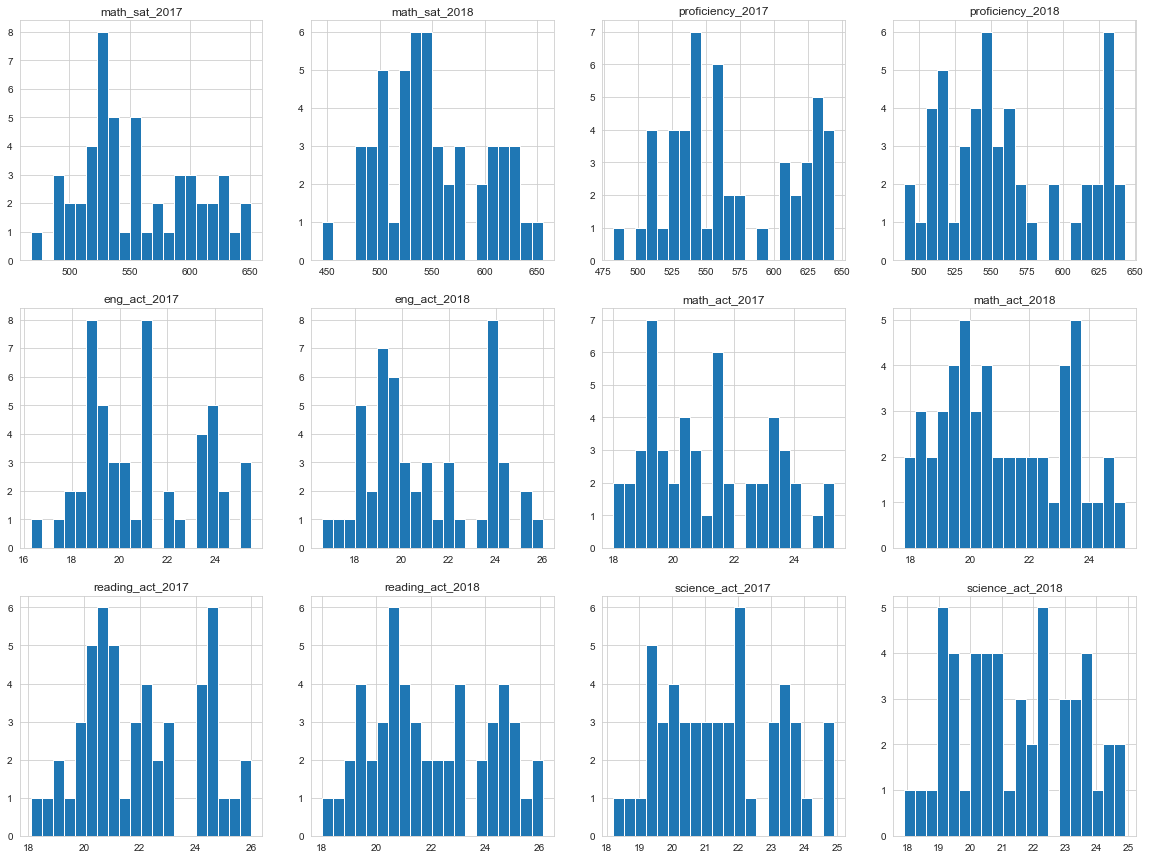

In [99]:
fig = plt.figure(figsize=(20,15))

for i, col in enumerate(numeric_columns): # for index and column name 
    
    fig.add_subplot(3,4,1+i) # create subplots, use index to increment 
    
    col_data = df_final[col]
    
    plt.hist(col_data, bins=20)
    
    plt.title(col)

## Outside Research

In [100]:
#Very close participation rate for both the test. 

df_final[df_final['part_sat_2017'] > 60]

,state,part_sat_2017,proficiency_2017,math_sat_2017,total_sat_2017,part_act_2017,eng_act_2017,math_act_2017,reading_act_2017,science_act_2017,...,part_sat_2018,proficiency_2018,math_sat_2018,total_sat_2018,part_act_2018,composite_act_2018,eng_act_2018,math_act_2018,reading_act_2018,science_act_2018
6,Connecticut,100.0,530.0,512.0,1041.0,31.0,25.5,24.6,25.6,24.6,...,100.0,535,519,1053,26.0,25.6,26.0,24.8,26.1,24.9
7,Delaware,100.0,503.0,492.0,996.0,18.0,24.1,23.4,24.8,23.6,...,100.0,505,492,998,17.0,23.2,23.7,23.1,24.5,23.4
8,District of Columbia,100.0,482.0,468.0,950.0,32.0,24.4,23.5,24.9,23.5,...,92.0,497,480,977,32.0,23.6,23.7,22.7,24.4,23.0
9,Florida,83.0,520.0,497.0,1017.0,73.0,19.0,19.4,21.0,19.4,...,97.0,522,493,1014,66.0,19.9,19.2,19.3,21.1,19.5
10,Georgia,61.0,535.0,515.0,1050.0,55.0,21.0,20.9,22.0,21.3,...,70.0,542,522,1064,53.0,21.4,20.9,20.7,21.2,21.4
12,Idaho,93.0,513.0,493.0,1005.0,38.0,21.9,21.8,23.0,22.1,...,100.0,508,493,1001,36.0,22.3,21.9,21.6,23.2,22.1
14,Indiana,63.0,542.0,532.0,1074.0,35.0,22.0,22.4,23.2,22.3,...,67.0,546,539,1086,32.0,22.5,21.9,22.3,23.1,22.2
19,Maine,95.0,513.0,499.0,1012.0,8.0,24.2,24.0,24.8,23.7,...,99.0,512,501,1013,7.0,24.0,23.8,23.6,24.7,23.4
20,Maryland,69.0,536.0,524.0,1060.0,28.0,23.3,23.1,24.2,23.0,...,76.0,545,535,1080,31.0,22.5,22.1,22.0,23.1,22.2
21,Massachusetts,76.0,555.0,551.0,1107.0,29.0,25.4,25.3,25.9,24.7,...,80.0,562,563,1125,25.0,25.5,25.5,25.2,25.9,24.7


In [101]:
df_final[df_final['part_act_2017'] >= 60]

,state,part_sat_2017,proficiency_2017,math_sat_2017,total_sat_2017,part_act_2017,eng_act_2017,math_act_2017,reading_act_2017,science_act_2017,...,part_sat_2018,proficiency_2018,math_sat_2018,total_sat_2018,part_act_2018,composite_act_2018,eng_act_2018,math_act_2018,reading_act_2018,science_act_2018
0,Alabama,5.0,593.0,572.0,1165.0,100.0,18.9,18.4,19.7,19.4,...,6.0,595,571,1166,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,38.0,547.0,533.0,1080.0,65.0,18.7,19.8,20.4,19.9,...,43.0,562,544,1106,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,30.0,563.0,553.0,1116.0,62.0,18.6,19.8,20.1,19.8,...,29.0,577,572,1149,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,3.0,614.0,594.0,1208.0,100.0,18.9,19.0,19.7,19.5,...,5.0,592,576,1169,100.0,19.4,19.1,18.9,19.7,19.4
5,Colorado,11.0,606.0,595.0,1201.0,100.0,20.1,20.3,21.2,20.9,...,100.0,519,506,1025,30.0,23.9,23.9,23.2,24.4,23.5
9,Florida,83.0,520.0,497.0,1017.0,73.0,19.0,19.4,21.0,19.4,...,97.0,522,493,1014,66.0,19.9,19.2,19.3,21.1,19.5
11,Hawaii,55.0,544.0,541.0,1085.0,90.0,17.8,19.2,19.2,19.3,...,56.0,550,549,1099,89.0,18.9,18.2,19.0,19.1,19.0
13,Illinois,9.0,559.0,556.0,1115.0,93.0,21.0,21.2,21.6,21.3,...,99.0,513,506,1019,43.0,23.9,24.1,23.4,24.2,23.4
15,Iowa,2.0,641.0,635.0,1275.0,67.0,21.2,21.3,22.6,22.1,...,3.0,634,632,1265,68.0,21.8,21.0,21.2,22.5,22.0
16,Kansas,4.0,632.0,628.0,1260.0,73.0,21.1,21.3,22.3,21.7,...,4.0,633,631,1265,71.0,21.6,21.0,21.1,22.3,21.5


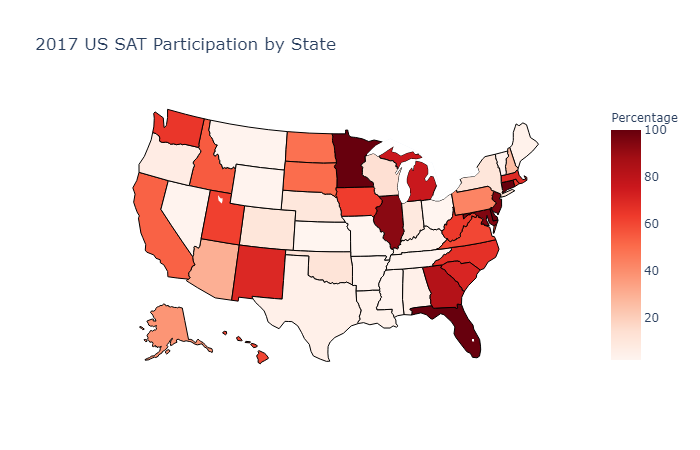

In [102]:
# Load data frame and tidy it.

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

df_final['code'] = df['code']

fig_sat_2017 = go.Figure(data=go.Choropleth(
    locations=df_final['code'], # Spatial coordinates
    z = df_final['part_sat_2017'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Percentage",
))

fig_sat_2017.update_layout(
    title_text = '2017 US SAT Participation by State',
    geo_scope='usa', # limite map scope to USA
)

# fig_sat_2017.show()

Image(filename ='../img/sat2017.png') 

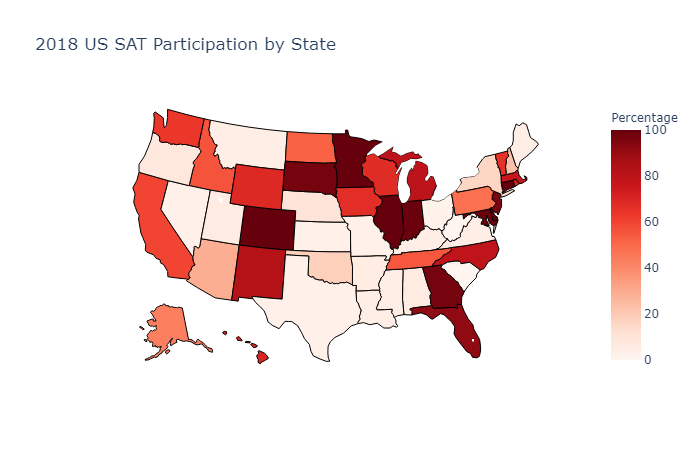

In [103]:
fig_sat_2018 = go.Figure(data=go.Choropleth(
    locations=df_final['code'], # Spatial coordinates
    z = df_final['part_sat_2018'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Percentage",
))

fig_sat_2018.update_layout(
    title_text = '2018 US SAT Participation by State',
    geo_scope='usa', # limite map scope to USA
)

# fig_sat_2018.show()

Image(filename ='../img/sat2018.png') 

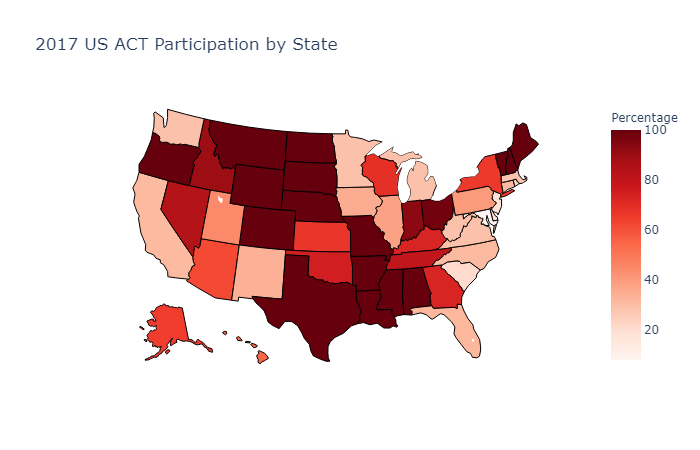

In [104]:
fig_act_2017 = go.Figure(data=go.Choropleth(
    locations=df_final['code'], # Spatial coordinates
    z = df_final['part_act_2017'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Percentage",
))

fig_act_2017.update_layout(
    title_text = '2017 US ACT Participation by State',
    geo_scope='usa', # limite map scope to USA
)

# fig_act_2017.show()

Image(filename ='../img/act2017.png') 

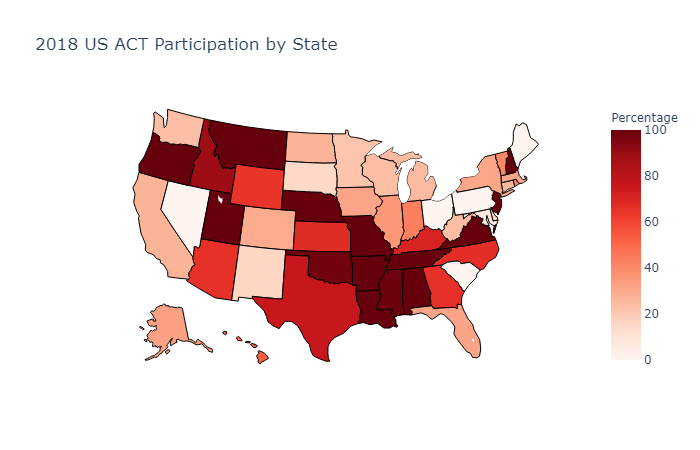

In [105]:
fig_act_2018 = go.Figure(data=go.Choropleth(
    locations=df_final['code'], # Spatial coordinates
    z = df_final['part_act_2018'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Percentage",
))

fig_act_2018.update_layout(
    title_text = '2018 US ACT Participation by State',
    geo_scope='usa', # limite map scope to USA
)

# fig_act_2018.show()

Image(filename ='../img/act2018.png') 

## Conclusions and Recommendations

#### Conclusions:

There are 19 states with SAT participation rate of 60% or greater. Whereas there are 30 states with ACT participation rate of 60% of more. The board should give scholarship to students who participate in SAT exams rather than ACT to increase participation rate for SAT. For instance, Missouri as a SAT participation rate of 3% in 2017 and 4% in SAT 2018. This can be surely brought up by giving students incentives to take SATs. 

In [106]:
#Missouri is a perfect example of how big is the difference between SAT and ACT Participation. 

df_final[df_final['state'] == "Missouri"]

,state,part_sat_2017,proficiency_2017,math_sat_2017,total_sat_2017,part_act_2017,eng_act_2017,math_act_2017,reading_act_2017,science_act_2017,...,proficiency_2018,math_sat_2018,total_sat_2018,part_act_2018,composite_act_2018,eng_act_2018,math_act_2018,reading_act_2018,science_act_2018,code
25,Missouri,3.0,640.0,631.0,1271.0,100.0,19.8,19.9,20.8,20.5,...,633,629,1262,100.0,20.0,19.5,19.7,20.5,20.0,MT


#### Recommendations:

In order to increase the participation of both test ACT and SAT, the College Board should collaborate with state departments of education and local education agencies set up a statewide testing requirements, full or partial funding or free test preparation programs. In addition, the College Board should cover all or part of exam fees, offer more SAT school Days, collect more data from the school district to help find a more suitable target.